In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt



#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [2]:
import pickle

In [3]:
%run custom_functions_test.ipynb

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [5]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [7]:
X = df.drop(['label'], axis = 1)

In [8]:
y = df['label']

In [9]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# df_train_full = X_train.copy()
# df_train_full['label']= y_train
# train_full_df.to_csv('train_full_df.csv')

In [10]:
y.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

## Comparing Vectorization and Method Performance

In [18]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression(random_state=10)
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



## Testing Fun

In [11]:
%run custom_functions_test.ipynb

In [31]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics2, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='smote')

In [32]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='upsample')

In [33]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,
                              LogisticRegression(), count_vect, sampling='downsample')

In [34]:
X_train_t, X_val_t, y_train_pred, y_val_pred3, y_val_prob, metrics3, pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, log, count_vect)

## Naive Bayes

In [ ]:
np.random.seed(0)

In [ ]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

## Logistic Regression

In [ ]:
%run custom_functions_test.ipynb

In [24]:
#Logistic Regression: compare vectorizers with no presets
lr_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', random_state = 10), 
                                            vectorization_list)

lr_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.95,0.95,0.93
Train F1,0.89,0.48,0.48,0.14
Train Precision,0.99,0.88,0.89,0.93
Train Recall,0.81,0.33,0.33,0.08
Validation Accuracy,0.96,0.95,0.95,0.94
Validation F1,0.62,0.44,0.43,0.13
Validation Precision,0.86,0.84,0.88,0.96
Validation Recall,0.49,0.30,0.29,0.07


In [25]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
lr_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight= 'balanced', 
                            solver = 'lbfgs', random_state = 10), vectorization_list)
lr_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.89,0.90,0.54
Train F1,0.93,0.55,0.58,0.23
Train Precision,0.86,0.39,0.41,0.13
Train Recall,0.99,0.92,0.94,0.92
Validation Accuracy,0.95,0.87,0.88,0.52
Validation F1,0.66,0.43,0.44,0.18
Validation Precision,0.62,0.30,0.31,0.10
Validation Recall,0.71,0.75,0.74,0.83


In [26]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
lr_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', 
                            random_state = 10), vectorization_list, sampling = 'upsample')
lr_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.80
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.93,0.94,0.88
Train Recall,1.00,0.96,0.98,0.69
Validation Accuracy,0.95,0.91,0.91,0.87
Validation F1,0.65,0.51,0.53,0.32
Validation Precision,0.62,0.38,0.41,0.24
Validation Recall,0.68,0.76,0.76,0.47


In [27]:
#Logistic Regression: compare vectorizers using lemmitizing + downsampling
lr_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'downsample')
lr_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.92,0.93,0.81
Train F1,0.99,0.92,0.93,0.79
Train Precision,0.99,0.91,0.92,0.90
Train Recall,0.99,0.92,0.93,0.71
Validation Accuracy,0.86,0.84,0.84,0.82
Validation F1,0.42,0.40,0.40,0.29
Validation Precision,0.29,0.26,0.27,0.19
Validation Recall,0.82,0.82,0.81,0.54


In [274]:
#Logistic Regression: compare vectorizers using lemmitizing + smote
lr_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'smote', sample_class='not majority')
lr_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.90,0.90,0.57
Train F1,0.77,0.54,0.56,0.22
Train Precision,0.68,0.40,0.42,0.13
Train Recall,0.88,0.84,0.85,0.87
Validation Accuracy,0.89,0.88,0.89,0.55
Validation F1,0.45,0.44,0.44,0.18
Validation Precision,0.34,0.31,0.32,0.10
Validation Recall,0.68,0.72,0.71,0.78


In [ ]:
# with open('mycsvfile.csv','a') as f:
#     w = csv.writer(f)
#     w.writerows(LR_cw_lemm.items())

In [ ]:
# (pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

### Grid Searching

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

##  Final Logistic Regression Model

In [ ]:
lr_final = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, sampling='help')
pd.DataFrame(lr_final)

In [358]:
log = LogisticRegression(class_weight='balanced', penalty = 'l1', C = .001)

In [359]:
log.fit(X_val_countvect,y_val)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [360]:
y_pred_val_lr = log.predict_proba(X_val_countvect)

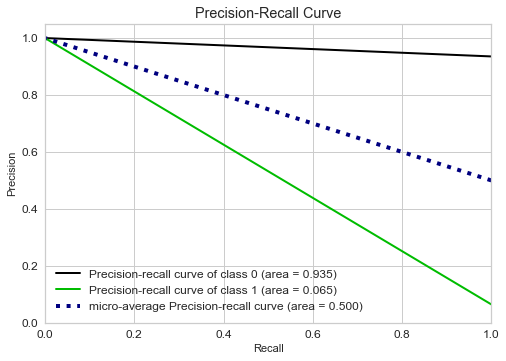

In [361]:
skplt.metrics.plot_precision_recall_curve(y_val, y_pred_val_lr)

In [318]:
# weighted_predictions_val = []
# for item in y_pred_val_lr:
#     if item[0] <= .85:
#         weighted_predictions_val.append(1)
#     else:
#         weighted_predictions_val.append(0)

Adjusted Accuracy: 0.9669534610872116
Adjusted Precision: 0.6619718309859155
Adjusted Recall: 0.996969696969697
Adjusted F1 Score: 0.7956469165659008




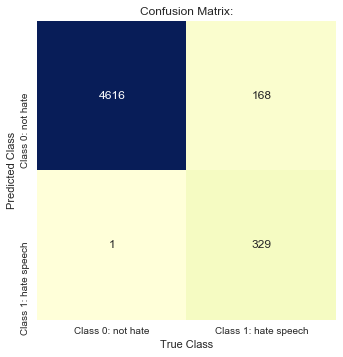

In [344]:
adjust_threshold_and_score(y_val, y_pred_val_lr, .9)

In [ ]:
pred_df[pred_df['actual_class'] != pred_df['predicted_class']]
pred_df.head()

In [ ]:
pred_df['weighted_predictions'] = weighted_predictions_val
pred_df[pred_df['actual_class'] != pred_df['weighted_predictions']].head()

In [ ]:
df.tweet[11418]

## Testing on Test Set

In [ ]:
X_train_transformed, metrics_dict, train_confusion_matrix, y_test_pred, y_test_prob, test_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_test.lem_tweet, y_test, 
                            logreg, count_vect, apply_smote = False)

## SVM


In [ ]:
svm_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', random_state = 10), 
                            vectorization_list)
svm_results1 

In [ ]:
svm_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', class_weight = 'balanced', random_state = 10), 
                            vectorization_list)
svm_results2

In [ ]:
svm_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', random_state = 10), 
                            vectorization_list, sampling = 'upsample')
svm_results3 

In [ ]:
svm_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', random_state = 10), 
                            vectorization_list, sampling = 'downsample')
svm_results4 

In [ ]:
svm_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(class_weight ='balanced', gamma='auto', random_state = 10), 
                            vectorization_list, sampling = 'smote', sample_class='not majority')
svm_results5 

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
# svc = SVC(kernel='linear', C=1, gamma=1, class_weight ='balanced')

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4],
'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }

svm_gs= GridSearchCV(svc, param_grid = params, cv = 3)

scores = ['f1','accuracy','recall']

In [ ]:
svm_gs.fit(X_train_tfid2, y_train)

In [ ]:
svm_gs.best_estimator_

# Random Forest

### Compare Multiple Methods:

In [ ]:
  RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)

In [33]:
#Random Forest: compare vectorizers with lemmatizing; no hyperparameter tuning
rfc_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), vectorization_list)
rfc_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.95
Train F1,0.96,0.94,0.94,0.43
Train Precision,1.00,1.00,1.00,0.93
Train Recall,0.92,0.88,0.89,0.28
Validation Accuracy,0.96,0.96,0.96,0.94
Validation F1,0.59,0.55,0.57,0.17
Validation Precision,0.92,0.83,0.84,0.58
Validation Recall,0.43,0.41,0.43,0.10


In [34]:
#Random Forest: compare vectorizers with lemmatizing and class weights balanced
rfc_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10, class_weight = 'balanced'), 
                            vectorization_list)
rfc_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.62
Train F1,0.95,0.94,0.93,0.25
Train Precision,1.00,0.97,0.97,0.15
Train Recall,0.91,0.90,0.90,0.92
Validation Accuracy,0.96,0.95,0.95,0.58
Validation F1,0.50,0.52,0.51,0.18
Validation Precision,0.96,0.80,0.77,0.10
Validation Recall,0.34,0.39,0.38,0.71


In [35]:
#Random Forest: compare vectorizers with lemmatizing and upsampling
rfc_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'upsample')
rfc_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,1.00,1.00,1.00,0.85
Train F1,1.00,1.00,1.00,0.83
Train Precision,1.00,1.00,1.00,0.94
Train Recall,1.00,1.00,1.00,0.74
Validation Accuracy,0.96,0.95,0.96,0.91
Validation F1,0.57,0.57,0.58,0.36
Validation Precision,0.86,0.73,0.78,0.32
Validation Recall,0.42,0.47,0.47,0.40


In [36]:
#Random Forest: compare vectorizers with lemmatizing and downsampling
rfc_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'downsample')
rfc_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.86
Train F1,0.99,0.99,0.99,0.85
Train Precision,1.00,1.00,0.99,0.96
Train Recall,0.98,0.99,0.99,0.76
Validation Accuracy,0.85,0.85,0.83,0.81
Validation F1,0.38,0.39,0.36,0.27
Validation Precision,0.26,0.26,0.23,0.18
Validation Recall,0.71,0.73,0.75,0.54


In [65]:
#Random Forest: compare vectorizers with lemmatizing and smote
rfc_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
rfc_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,1.00,1.00,0.64
Train F1,0.95,0.98,0.98,0.26
Train Precision,0.95,0.98,0.98,0.15
Train Recall,0.96,0.98,0.98,0.87
Validation Accuracy,0.89,0.94,0.94,0.59
Validation F1,0.37,0.49,0.51,0.18
Validation Precision,0.29,0.51,0.51,0.10
Validation Recall,0.51,0.47,0.50,0.69


### Grid-Searching For Best Fit for Count Vectorizer + Upsampling

In [ ]:
np.random.seed(0)

In [72]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [70]:
# rfc = RandomForestClassifier(random_state=10)

# parameters = {'n_estimators' : [40, 60, 80, 100, 120, 150],
# 'max_leaf_nodes' : [100, 200, 400, 600],
# 'random_state' : [10],
# 'max_depth': [5, 7, 10, 20, 30],
#  'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }
# # 'class_weight': ['balanced', 'balanced_subsample']}
          
# rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [109]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(10)
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100, 120],
'max_leaf_nodes' : [100, 200, 300, 400],
'random_state' : [10],
'max_depth': [5, 6, 7, 8, 10, 20, 25, 30],
 'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:6, 1: 4}, {0:8, 1:2}]}
'class_weight': ['balanced', 'balanced_subsample']}

scores = ['accuracy','recall','precision','f1']

rfc_gs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [110]:
rfc_gs.fit(X_train_countvect, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [103]:
rfc_gs.best_params_

{'verbose': 0,
 'random_state': 10,
 'n_estimators': 120,
 'max_leaf_nodes': 200,
 'max_depth': 25}

In [112]:
rfc_gs.best_score_

0.583238868701109

In [129]:
rfc_df = pd.DataFrame(rfc_gs.cv_results_)
rfc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbose,param_random_state,param_n_estimators,param_max_leaf_nodes,param_max_depth,param_class_weight,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,3.203798,0.038520,0.259745,0.001426,0,10,60,300,20,balanced,...,0.491611,0.499548,0.013771,4,0.515942,0.552253,0.540590,0.536261,0.015137,4
1,1.075692,0.008021,0.129959,0.000065,0,10,40,100,10,balanced,...,0.343503,0.383235,0.032485,9,0.457473,0.491409,0.442826,0.463902,0.020348,9
2,5.283895,0.010074,0.376187,0.001355,0,10,80,200,25,balanced,...,0.568134,0.564288,0.005505,2,0.545455,0.569969,0.561658,0.559027,0.010180,3
3,2.658384,0.002739,0.306591,0.002813,0,10,100,400,10,balanced,...,0.399021,0.426567,0.024427,6,0.492308,0.535379,0.499617,0.509100,0.018819,6
4,1.496824,0.007262,0.246237,0.002625,0,10,80,300,7,balanced,...,0.384804,0.392981,0.014009,8,0.468354,0.501608,0.481595,0.483852,0.013669,8
5,0.835535,0.009098,0.186029,0.000857,0,10,60,100,5,balanced,...,0.301815,0.355002,0.041831,10,0.448885,0.488240,0.411726,0.449617,0.031240,10
6,8.271500,0.032379,0.515924,0.002303,0,10,100,300,30,balanced_subsample,...,0.628429,0.653556,0.020810,1,0.576659,0.606129,0.566929,0.583239,0.016666,1
7,1.937919,0.009552,0.358726,0.001212,0,10,120,300,6,balanced,...,0.380397,0.396500,0.016201,7,0.473811,0.507270,0.484758,0.488612,0.013929,7
8,5.329533,0.020736,0.369840,0.002044,0,10,80,100,25,balanced_subsample,...,0.535009,0.538371,0.003361,3,0.556762,0.573913,0.570335,0.567003,0.007388,2
9,2.122796,0.019565,0.176071,0.000862,0,10,40,200,20,balanced,...,0.475884,0.481441,0.032562,5,0.485581,0.542942,0.533333,0.520617,0.025084,5


In [132]:
rfc_df[rfc_df.rank_test_precision==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbose,param_random_state,param_n_estimators,param_max_leaf_nodes,param_max_depth,param_class_weight,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,8.2715,0.032379,0.515924,0.002303,0,10,100,300,30,balanced_subsample,...,0.628429,0.653556,0.02081,1,0.576659,0.606129,0.566929,0.583239,0.016666,1


In [84]:
%run custom_functions_test.ipynb

In [120]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [150]:
rfc3 = RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, class_weight='balanced_subsample',
                            max_depth = 25, random_state=10)

In [122]:
rfc3.fit(X_train_countvect, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=200,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [123]:
y_rfc2_pred = rfc3.predict(X_train_countvect)

In [127]:
metrics.f1_score(y_train, y_rfc2_pred)

0.12907348242811498

In [133]:
rfc_metrics2= \
wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200,
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            vectorization_list)

In [134]:
rfc_metrics2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.94,0.95,0.47
Train F1,0.78,0.67,0.68,0.20
Train Precision,0.76,0.59,0.61,0.11
Train Recall,0.79,0.77,0.77,0.93
Validation Accuracy,0.94,0.91,0.92,0.44
Validation F1,0.59,0.47,0.48,0.17
Validation Precision,0.56,0.38,0.40,0.09
Validation Recall,0.62,0.60,0.61,0.86


In [153]:
rfc_metrics

{'Train Accuracy': 0.97,
 'Train Precision': 0.76,
 'Train Recall': 0.79,
 'Train F1': 0.78,
 'Validation Accuracy': 0.94,
 'Validation Precision': 0.56,
 'Validation Recall': 0.62,
 'Validation F1': 0.59}

In [228]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [143]:
print_classification_report(y_val, rfc_y_val_pred)

              precision    recall  f1-score   support

    not hate       0.97      0.97      0.97      4784
 hate speech       0.56      0.62      0.59       330

    accuracy                           0.94      5114
   macro avg       0.77      0.79      0.78      5114
weighted avg       0.95      0.94      0.95      5114



In [227]:
%run custom_functions_test.ipynb

In [269]:
# print confusion matrix    
pd.DataFrame(confusion_matrix(y_val, rfc_y_val_pred), index = ['actual 0','actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4757,27
actual 1,168,162


In [255]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 200, 
                            class_weight = 'balanced_subsample', max_depth = 25, random_state=10), 
                            count_vect)

In [223]:
rfc_y_val_prob

,0,1
0,0.632546,0.367454
1,0.580317,0.419683
2,0.542464,0.457536
3,0.523669,0.476331
4,0.643522,0.356478
5,0.582407,0.417593
6,0.535656,0.464344
7,0.556556,0.443444
8,0.524894,0.475106
9,0.564542,0.435458


In [246]:
rfc_pred_df.head()

,prob 0,prob 1,predicted class,actual class,threshold
17631,0.63,0.37,0,0,0
20997,0.58,0.42,0,0,0
20465,0.54,0.46,0,0,0
29819,0.52,0.48,0,0,0
15058,0.64,0.36,0,0,0


In [252]:
rfc_pred_df.threshold.values

array([0, 0, 0, ..., 0, 0, 0])

In [253]:
pr_threshold_df.head()

,cut_off,recall,precision
0,0.200,0.618182,0.56044
1,0.215,0.618182,0.56044
2,0.230,0.618182,0.56044
3,0.245,0.618182,0.56044
4,0.260,0.618182,0.56044


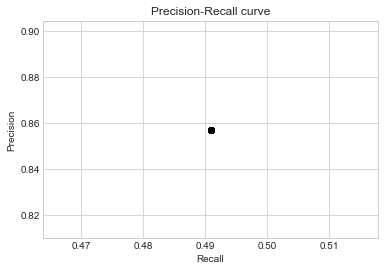

In [256]:
# def frange(start, stop, step):
#     i = start
#     while i < stop:
#         yield i
#         i += step

# names = ['cut_off', 'recall', 'precision']
# pr_threshold_df = pd.DataFrame()

# # for loop to test different cut-off values
# for i in frange(.2,.95,.015):
#     rfc_pred_df['threshold'] = np.where(rfc_pred_df['prob 1'] >= i, 1, 0)
#     tn, fp, fn, tp = confusion_matrix(rfc_pred_df['actual class'], rfc_pred_df['predicted class']).ravel()
#     recall = tp/(tp+fn)
#     precision = tp/(tp+fp)
#     evals = [i,recall, precision]
#     pr_threshold_df = pr_threshold_df.append(pd.Series(evals), ignore_index=True)

# pr_threshold_df.columns = names

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('seaborn-whitegrid')
# # plot the data
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , '-', color='blue')
# plt.plot(pr_threshold_df.recall, pr_threshold_df.precision , 'o', color='black')

# plt.title('Precision-Recall curve')
# plt.ylabel('Precision')
# plt.xlabel('Recall')
# plt.savefig('pr_curve')


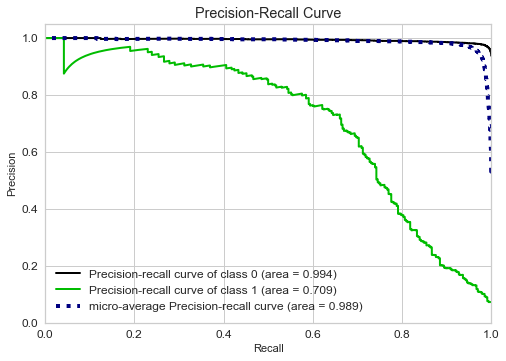

In [266]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight={0: 2, 1: 8},
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=400, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [ ]:
rfc2.fit(X_train_countvect, y_train)

In [ ]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train, y_train_predict)

In [ ]:
y_val_predict = rfc2.predict(X_val_countvect)

In [ ]:
metrics.f1_score(y_val, y_val_predict)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(rfc2):
    n_features = X_val_countvect.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), countvect.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

In [ ]:
type(df.tokenized_tweet[0])

In [ ]:
(X_train.tokenized_tweet[0])

In [ ]:
X_train.tokenized_tweet.head()

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
X_train_token_list = list(X_train.tokenized_tweet)

In [ ]:
type(X_train_token_list[0])

In [ ]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [ ]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

#### X-val pre-processing

In [ ]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [ ]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Training Model

In [ ]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [ ]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [ ]:
w2v.corpus_count

In [ ]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(['racist'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [ ]:
X_train_w2v[20]

In [ ]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [ ]:
X_train_w2v_2[10]

## Classification with Word Embeddings

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

### Glove

In [ ]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
w2v.most_similar('black')

In [ ]:
glove_model.most_similar('black')

In [ ]:
glove_model['love']

In [ ]:
X_train_token_list[0]

In [ ]:
X_train_glove2 = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [ ]:
X_train_w2v[10]

In [ ]:
X_train_w2v_2[10]

In [ ]:
X_train_glove[255]

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression (class_weight='balanced'))

##  Testing Scraped Trump Tweets

In [ ]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
logreg.fit(X_train_countvect, y_train_up)

In [ ]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [ ]:
X_trump = X_trump.toarray()

In [ ]:
X_trump.shape

In [ ]:
y_trump_predict = logreg.predict(X_trump)

In [ ]:
y_trump_predict

In [ ]:
trump_df['predictions'] = y_trump_predict

In [ ]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [ ]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [ ]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [ ]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [ ]:
trump0 = trump_df[trump_df.predictions == 0]

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
trump0.tweet

In [ ]:
trump_df

In [ ]:
trump_df[trump_df.predictions == 0]

In [ ]:
trump1 = trump_df[trump_df.predictions == 1]

In [ ]:
trump1.tweet